<h1>**Part 1 Binary Classification**</h1>
<h1>1.1 Data Munging</h1>

In [225]:
### Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import decimal
from __future__ import division

In [2]:
### Read the training and testing data. Print the number of features in the dataset.
Wisconsin_Breast_cancer_test = pd.read_csv("~/data/test_wbcd.csv")
Wisconsin_Breast_cancer_train = pd.read_csv("~/data/train_wbcd.csv")

In [222]:
### List features
n_features = Wisconsin_Breast_cancer_test.shape[1]
print("number of features: %d" % n_features)

number of features: 32


In [223]:
n_features = Wisconsin_Breast_cancer_train.shape[1]
print("number of features: %d" % n_features)

number of features: 32


In [3]:
### Preview the datasets
Wisconsin_Breast_cancer_test.head()

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
1,892189,M,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.360,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
2,8810528,B,11.840,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,...,13.300,24.99,85.22,546.3,0.1280,0.18800,0.14710,0.06913,0.2535,0.07993
3,905978,B,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,...,10.850,31.24,68.73,359.4,0.1526,0.11930,0.06141,0.03770,0.2872,0.08304
4,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,...,9.092,29.72,58.08,249.8,0.1630,0.43100,0.53810,0.07879,0.3322,0.14860


In [4]:
Wisconsin_Breast_cancer_train.head()

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.06260,0.08216,0.2136,0.06710
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
2,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.33440,0.10170,0.1999,0.07127
3,90317302,B,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722
4,914102,B,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.11180,0.1646,0.07698,0.04195,0.2687,0.07429


In [5]:
### For the data label, print the total number of 1's and 0's in the training and testing data.
# Data label is B or M in "Diagnosis", convert to 1 and 0, B = 1, M = 0
breastCancertest = Wisconsin_Breast_cancer_test.Diagnosis == 'B'
malignantTest = Wisconsin_Breast_cancer_test.Diagnosis == 'M'
breastCancertrain = Wisconsin_Breast_cancer_train.Diagnosis == 'B'
malignantTrain = Wisconsin_Breast_cancer_train.Diagnosis == 'M'
column_name = 'Diagnosis'
Wisconsin_Breast_cancer_test.loc[breastCancertest, column_name] = 1
Wisconsin_Breast_cancer_test.loc[malignantTest, column_name] = 0
Wisconsin_Breast_cancer_train.loc[breastCancertrain, column_name] = 1
Wisconsin_Breast_cancer_train.loc[malignantTrain, column_name] = 0

In [6]:
### Preview the change
Wisconsin_Breast_cancer_test.head()

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,894047,1,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
1,892189,0,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.360,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
2,8810528,1,11.840,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,...,13.300,24.99,85.22,546.3,0.1280,0.18800,0.14710,0.06913,0.2535,0.07993
3,905978,1,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,...,10.850,31.24,68.73,359.4,0.1526,0.11930,0.06141,0.03770,0.2872,0.08304
4,871001502,1,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,...,9.092,29.72,58.08,249.8,0.1630,0.43100,0.53810,0.07879,0.3322,0.14860


In [7]:
Wisconsin_Breast_cancer_train.head()

,Patient_ID,Diagnosis,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,909410,1,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.06260,0.08216,0.2136,0.06710
1,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
2,8912284,1,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.33440,0.10170,0.1999,0.07127
3,90317302,1,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722
4,914102,1,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,...,14.50,28.46,95.29,648.3,0.11180,0.1646,0.07698,0.04195,0.2687,0.07429


In [8]:
### Data points for each class
print(np.unique(Wisconsin_Breast_cancer_train.Diagnosis, return_counts=True))

(array([0, 1], dtype=int64), array([42, 58], dtype=int64))


42 malignant and 58 breast cancer. Fairly well balanced training data.

In [9]:
print(np.unique(Wisconsin_Breast_cancer_test.Diagnosis, return_counts=True))

(array([0, 1], dtype=int64), array([ 6, 14], dtype=int64))


6 malignant and 14 breast cancer. Unbalanced test data with more than twice the amount of breast cancer compared to malignant.

In [10]:
### Print the number of features with missing entries.
print(np.isnan(Wisconsin_Breast_cancer_train).sum())

Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           2
f22           0
f23           0
f24           0
f25           0
f26           0
f27           0
f28           0
f29           0
f30           0
dtype: int64


From our training dataset we can see only 2 counts of missing data for 'f21'.

In [11]:
print(np.isnan(Wisconsin_Breast_cancer_test).sum())

Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           1
f22           0
f23           0
f24           0
f25           0
f26           0
f27           0
f28           0
f29           0
f30           0
dtype: int64


In our test set we can see only 1 count of missing data in 'f21'.

In [12]:
f21_mean_train = np.mean(Wisconsin_Breast_cancer_train['f21'])
#print(f21_mean_train)
Wisconsin_Breast_cancer_train['f21'] = Wisconsin_Breast_cancer_train['f21'].fillna(f21_mean_train)
Wisconsin_Breast_cancer_test['f21'] = Wisconsin_Breast_cancer_test['f21'].fillna(f21_mean_train)

In [13]:
### Confirm fillna operation.
print(np.isnan(Wisconsin_Breast_cancer_test).sum())

Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           0
f22           0
f23           0
f24           0
f25           0
f26           0
f27           0
f28           0
f29           0
f30           0
dtype: int64


In [14]:
print(np.isnan(Wisconsin_Breast_cancer_train).sum())

Patient_ID    0
Diagnosis     0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
f12           0
f13           0
f14           0
f15           0
f16           0
f17           0
f18           0
f19           0
f20           0
f21           0
f22           0
f23           0
f24           0
f25           0
f26           0
f27           0
f28           0
f29           0
f30           0
dtype: int64


In [15]:
### Split into X_train, Y_train, X_test, Y_test pairs
X_train = Wisconsin_Breast_cancer_train.values[:,2:]
Y_train = Wisconsin_Breast_cancer_train.values[:,1]
X_test = Wisconsin_Breast_cancer_test.values[:,2:]
Y_test = Wisconsin_Breast_cancer_test.values[:,1]

In [16]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.1017,0.06260,0.08216,0.2136,0.06710
1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
2,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,0.05935,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.33440,0.10170,0.1999,0.07127
3,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,0.1800,0.06569,...,11.38,15.65,73.23,394.5,0.13430,0.1650,0.08615,0.06696,0.2937,0.07722
4,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,...,14.50,28.46,95.29,648.3,0.11180,0.1646,0.07698,0.04195,0.2687,0.07429


In [17]:
pd.DataFrame(Y_train).head()

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [18]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
1,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,0.1619,0.06287,...,13.360,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
2,11.840,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,0.06057,...,13.300,24.99,85.22,546.3,0.1280,0.18800,0.14710,0.06913,0.2535,0.07993
3,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,0.2025,0.06601,...,10.850,31.24,68.73,359.4,0.1526,0.11930,0.06141,0.03770,0.2872,0.08304
4,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.43100,0.53810,0.07879,0.3322,0.14860


In [19]:
pd.DataFrame(Y_test).head()

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [20]:
print("X_train: \t", X_train.shape, "\nY_train: \t", Y_train.shape, "\nX_test: \t", X_test.shape, "\nY_test: \t", Y_test.shape)

X_train: 	 (100, 30) 
Y_train: 	 (100,) 
X_test: 	 (20, 30) 
Y_test: 	 (20,)


In [21]:
### Normalize the training and testing data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [22]:
# view normalised sample to check
pd.DataFrame(X_train_norm).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.055485,-0.753469,-0.121442,-0.164072,-1.194152,-0.876575,-0.827056,-0.545367,-0.767734,-1.128128,...,-0.304937,-0.912142,-0.341934,-0.370332,-1.325803,-1.016305,-1.028702,-0.473441,-1.296842,-1.145820
1,1.633965,-1.033798,1.642855,1.728069,0.342875,0.464608,1.280996,1.312964,0.036827,-0.644680,...,1.170658,-1.308804,1.193778,1.119295,0.219872,-0.373979,0.581328,0.599908,-0.905710,-0.489469
2,-0.359963,-0.744974,-0.335050,-0.410421,-1.304365,-0.179940,0.251546,-0.369043,-1.341897,-0.560035,...,-0.500265,-0.855047,-0.463588,-0.527180,-1.514012,-0.207956,0.268293,-0.212385,-1.531864,-0.863074
3,-1.068616,-1.484023,-1.045653,-0.944769,0.317555,-0.534964,-0.846574,-0.708789,0.003913,0.471973,...,-0.987617,-1.462060,-0.984688,-0.865250,0.078943,-0.622702,-0.916325,-0.676515,0.077266,-0.459635
4,-0.287212,0.282899,-0.335825,-0.349861,-1.664048,-0.929881,-0.861213,-0.878901,-0.314254,-0.636541,...,-0.384228,0.462652,-0.376141,-0.438585,-0.943930,-0.625189,-0.960083,-1.010650,-0.351607,-0.658303


In [23]:
pd.DataFrame(X_test_norm).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.516711,-0.129100,-1.497679,-1.219890,0.871600,-0.830237,-1.075434,-1.178987,1.331438,1.757914,...,-1.457177,-0.441857,-1.442063,-1.124813,0.097127,-1.165725,-1.327422,-1.571106,0.428941,-0.192484
1,-0.664442,-0.226790,-0.687056,-0.644712,0.296704,-0.818565,-0.755887,-0.339178,-0.658021,0.012941,...,-0.604697,-0.299119,-0.657242,-0.597786,-0.857554,-1.152854,-1.035383,-0.614524,-1.567889,-1.006820
2,-0.642886,-0.056894,-0.667285,-0.653207,-0.520214,-0.646802,-0.757792,-0.846169,-0.972531,-0.361447,...,-0.616301,-0.058718,-0.653931,-0.610058,-0.207461,-0.479686,-0.625479,-0.647523,-0.612361,-0.275884
3,-1.298996,0.529248,-1.284072,-1.082878,0.648195,-0.775886,-0.831817,-0.878662,0.826759,0.524062,...,-1.090116,0.880349,-1.108825,-0.924257,0.910880,-0.906867,-1.034381,-1.067431,-0.034241,-0.065011
4,-1.618564,0.316878,-1.529468,-1.267296,-0.122553,0.424541,0.496710,-0.661005,1.547207,3.226165,...,-1.430102,0.651968,-1.402615,-1.108506,1.383675,1.031304,1.240324,-0.518465,0.737729,4.380271


<h1>1.2 Logistic Regression</h1>
<h3>L1 regularisation</h3>

In [24]:
### Train logistic regression models with L1 regularization and L2 regularization. Report accuracy, precision, recall, f1-score and print the confusion matrix.
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix

In [25]:
# Define Logistic Regression using L1 regularisation, alpha 0.1
LR = LogisticRegression(penalty = 'l1', C=1/0.1) # The inverse of the regularisation strength, we need the inverse of the inverse, hence 1/0.1

In [26]:
# Fit the model
LR.fit(X_train_norm, Y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# Predict
trained_predictions = LR.predict(X_train_norm)
print("Accuracy Score = {}".format(np.round(accuracy_score(Y_train,trained_predictions)*100,decimals=2)),
      "\nPrecision Score = {}".format(precision_score(Y_train,trained_predictions)),
      "\nRecall Score = {}".format(recall_score(Y_train,trained_predictions)),
      "\nF1-score = {}".format(f1_score(Y_train,trained_predictions)),
      "\nConfusion Matrix = \n", confusion_matrix(Y_train,trained_predictions)
     )

Accuracy Score = 100.0 
Precision Score = 1.0 
Recall Score = 1.0 
F1-score = 1.0 
Confusion Matrix = 
 [[42  0]
 [ 0 58]]


In [28]:
# Predict on test data
trained_predictions = LR.predict(X_test_norm)
print("Accuracy Score = {}".format(np.round(accuracy_score(Y_test,trained_predictions)*100,decimals=2)),
      "\nPrecision Score = {}".format(precision_score(Y_test,trained_predictions)),
      "\nRecall Score = {}".format(recall_score(Y_test,trained_predictions)),
      "\nF1-score = {}".format(f1_score(Y_test,trained_predictions)),
      "\nConfusion Matrix = \n", confusion_matrix(Y_test,trained_predictions)
     )

Accuracy Score = 95.0 
Precision Score = 0.9333333333333333 
Recall Score = 1.0 
F1-score = 0.9655172413793104 
Confusion Matrix = 
 [[ 5  1]
 [ 0 14]]


<h3>Using L2 regularisation</h3>

In [29]:
# Define Logistic Regression using L2 regularisation with lambda = 0.1
LR2 = LogisticRegression(penalty = 'l2', C=1/0.1) # The inverse of the regularisation strength, we need the inverse of the inverse, hence 1/0.1

In [30]:
# Fit the model
LR2.fit(X_train_norm, Y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# Predict
trained_predictions = LR2.predict(X_train_norm)
print("Accuracy Score = {}".format(np.round(accuracy_score(Y_train,trained_predictions)*100,decimals=2)),
      "\nPrecision Score = {}".format(precision_score(Y_train,trained_predictions)),
      "\nRecall Score = {}".format(recall_score(Y_train,trained_predictions)),
      "\nF1-score = {}".format(f1_score(Y_train,trained_predictions)),
      "\nConfusion Matrix = \n", confusion_matrix(Y_train,trained_predictions)
     )

Accuracy Score = 100.0 
Precision Score = 1.0 
Recall Score = 1.0 
F1-score = 1.0 
Confusion Matrix = 
 [[42  0]
 [ 0 58]]


In [32]:
# Predict on test data
trained_predictions = LR2.predict(X_test_norm)
print("Accuracy Score = {}".format(np.round(accuracy_score(Y_test,trained_predictions)*100,decimals=2)),
      "\nPrecision Score = {}".format(precision_score(Y_test,trained_predictions)),
      "\nRecall Score = {}".format(recall_score(Y_test,trained_predictions)),
      "\nF1-score = {}".format(f1_score(Y_test,trained_predictions)),
      "\nConfusion Matrix = \n", confusion_matrix(Y_test,trained_predictions)
     )

Accuracy Score = 95.0 
Precision Score = 0.9333333333333333 
Recall Score = 1.0 
F1-score = 0.9655172413793104 
Confusion Matrix = 
 [[ 5  1]
 [ 0 14]]


Conclusion: for the dataset there appears to be no discernable difference between L1 and L2 regularisation using logistic regression.

<h1>1.3 Choosing the best hyper-parameter</h1>

Testing to find the best hyperparameter for L1 Regularisation

In [33]:
# Import library for random splits
from sklearn.model_selection import train_test_split

# Initialise variables
random_trials = 100 
alpha_values = []
np.random.seed(100)

for alpha_set in [0.1,1,3,10,33,100,333,1000,3333,10000,33333]: # loop through required set of alpha values to find the "best" alpha value from the set (yielding the highest accuracy)
    accuracy = [] # reset accuracy for each alpha value
    
    for i in range(0,random_trials):
        # Splitting the TRAINING DATA only into training and validation data
        x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, test_size=0.40, random_state=42)
        
        # Fitting logistic regression using L1 regularisation
        lm = LogisticRegression(penalty='l1', C=1/alpha_set, verbose=0)
        lm.fit(x_train, y_train)
        
        # Running predictions against the L1 regularisation model 
        true_labels = lm.predict(x_validate)
        acc = accuracy_score(y_validate,true_labels)
        accuracy.append(acc)
    print(alpha_set, "=", np.mean(accuracy))
    alpha_values.append(np.mean(accuracy))
print('Maximum validation accuracy is {}'.format(max(alpha_values)))

0.1 = 0.9995
1 = 0.9257500000000001
3 = 0.9000000000000005
10 = 0.9000000000000005
33 = 0.9000000000000005
100 = 0.9000000000000005
333 = 0.925
1000 = 0.42499999999999977
3333 = 0.42499999999999977
10000 = 0.42499999999999977
33333 = 0.42499999999999977
Maximum validation accuracy is 0.9995


Conclusion: best hyperparameter is alpha of 0.1 with 0.9995 accuracy.

In [36]:
### Retraining of the L1 regularisation logistic regression model with an alpha of 0.1
LR_new_alpha = LogisticRegression(penalty = 'l1', C=1/0.1)

In [38]:
# Fit the model
LR_new_alpha.fit(X_train_norm, Y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# Predict on test data
trained_predictions = LR2.predict(X_test_norm)
print("Accuracy Score = {}".format(np.round(accuracy_score(Y_test,trained_predictions)*100,decimals=2)),
      "\nPrecision Score = {}".format(precision_score(Y_test,trained_predictions)),
      "\nRecall Score = {}".format(recall_score(Y_test,trained_predictions)),
      "\nF1-score = {}".format(f1_score(Y_test,trained_predictions)),
      "\nConfusion Matrix = \n", confusion_matrix(Y_test,trained_predictions)
     )

Accuracy Score = 95.0 
Precision Score = 0.9333333333333333 
Recall Score = 1.0 
F1-score = 0.9655172413793104 
Confusion Matrix = 
 [[ 5  1]
 [ 0 14]]


In [45]:
# The top 5 features selected in decreasing order of magnitude
top_features = LR_new_alpha.coef_
sorted_top_5 = pd.DataFrame(top_features.T)
sorted_top_5.sort_values(by=[0], axis=0, ascending=False, inplace=True)
print(sorted_top_5.head(n=5))

           0
9   0.145333
15  0.000000
11  0.000000
19  0.000000
18  0.000000


Highest accuracy of the L1 model is 95% with alpha of 0.1. Precision was 93% identifying the fraction correctly identified. Recall was especially high at 100%. The confusion matrix shows only 1 incorrectly predicted item returning a negative diagnosis whilst having an positive diagnosis (a false positive). The top 5 features are ranked 9, 15, 11, 19, 18 and are positive weight ascending order.

For the above model there are signs of underfitting as the original model using logistic regression on the training and test data achieved 100% whilst this model only achieved 95% accuracy. The model had 1 error in the confusion matrix (1 of 20) with F1-score and precision being lower.

Reasoning why the model fit with such high accuracy is due to the small amount of values within the model.

<h2>Testing to find the best hyperparameter for L2 Regularisation</h2>

In [41]:
# Initialise variables
random_trials = 100 
lambda_values = []
np.random.seed(100)

for lambda_set in [0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,33]: # loop through required set of lambda values to find the "best" lambda value from the set (yielding the highest accuracy)
    accuracy = [] # reset accuracy for each alpha value
    
    for i in range(0,random_trials):
        # Splitting the TRAINING DATA only into training and validation data
        x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, test_size=0.40, random_state=42)
        
        # Fitting logistic regression using L2 regularisation
        lm = LogisticRegression(penalty='l2', C=1/lambda_set, random_state=42) # verbose set to zero to try and stop the errors appearing around convergence (although it is meant to be zero by default)
        lm.fit(x_train, y_train)
        
        # Running predictions against the L2 regularisation model 
        true_labels = lm.predict(x_validate)
        acc = accuracy_score(y_validate,true_labels)
        accuracy.append(acc)
    print(lambda_set, "=", np.mean(accuracy))
    lambda_values.append(np.mean(accuracy))
print('Maximum validation accuracy is {}'.format(max(lambda_values)))

0.001 = 0.9749999999999995
0.003 = 0.9749999999999995
0.01 = 0.9749999999999995
0.03 = 0.9749999999999995
0.1 = 1.0
0.3 = 0.9749999999999995
1 = 0.9749999999999995
3 = 0.95
10 = 0.9000000000000005
33 = 0.9000000000000005
Maximum validation accuracy is 1.0


Conclusion: maximum validation accuracy is when lambda = 0.1.

In [42]:
# Define Logistic Regression using L2 regularisation with lambda = 0.1
LR_new_lambda = LogisticRegression(penalty = 'l2', C=1/0.1) # The inverse of the regularisation strength, we need the inverse of the inverse, hence 1/0.1

In [43]:
# Fit the model
LR_new_lambda.fit(X_train_norm, Y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# Predict on test data using optimal lambda
trained_predictions = LR_new_lambda.predict(X_test_norm)
print("Accuracy Score = {}".format(np.round(accuracy_score(Y_test,trained_predictions)*100,decimals=2)),
      "\nPrecision Score = {}".format(precision_score(Y_test,trained_predictions)),
      "\nRecall Score = {}".format(recall_score(Y_test,trained_predictions)),
      "\nF1-score = {}".format(f1_score(Y_test,trained_predictions)),
      "\nConfusion Matrix = \n", confusion_matrix(Y_test,trained_predictions)
     )

Accuracy Score = 95.0 
Precision Score = 0.9333333333333333 
Recall Score = 1.0 
F1-score = 0.9655172413793104 
Confusion Matrix = 
 [[ 5  1]
 [ 0 14]]


In [46]:
# The top 5 features selected in decreasing order of magnitude for 
top_features = LR_new_lambda.coef_
sorted_top_5 = pd.DataFrame(top_features.T)
sorted_top_5.sort_values(by=[0], axis=0, ascending=False, inplace=True)
print(sorted_top_5.head(n=5))

           0
9   0.958875
18  0.823487
15  0.587962
16  0.351436
4   0.328829


Highest accuracy of the L2 model is 95% with lmabda of 0.1. Precision was 93% identifying the fraction correctly identified. Recall was especially high at 100%. The confusion matrix shows only 1 incorrectly predicted item returning a negative diagnosis whilst having an positive diagnosis (a false positive). The top 5 features are ranked 9, 18, 15, 16, 4 and are positive weight ascending order.

For the above model there are signs of underfitting as the original model using logistic regression on the training and test data achieved 100% whilst this model only achieved 95% accuracy. The model had 1 error in the confusion matrix (1 of 20) with F1-score and precision being lower.

Reasoning why the model fit with such high accuracy is due to the small amount of values within the model.


<h1>Task B Multiclass Classification</h1>

<h3>2.1 Read and understand the data, create a default One-vs-Rest Classifier</h3>

<h4>Part 1</h4>

In [48]:
# Read in file
rmnist = pd.read_csv("C:/Personal/University/2018_T2 - SIT720 - Machine Learning/Assessment 2/reduced_mnist.csv")

In [61]:
print("Number of data points: \t\t", rmnist.shape, 
      "\nTotal number of features: \t", len(rmnist.columns),
      "\nUnique labels in the data: \t", len(np.unique(rmnist.iloc[:,0])),
      "\nUnique labes are: \t\t", np.unique(rmnist.iloc[:,0])
     )

Number of data points: 		 (2520, 785) 
Total number of features: 	 785 
Unique labels in the data: 	 10 
Unique labes are: 		 [0 1 2 3 4 5 6 7 8 9]


Features includes the feature we are predicting. If we remove this (785 - 1) then we have 784 features to predict / classify with.

<h4>Part 2</h4>

In [69]:
# Splitting into 70% training and 30% testing
from sklearn.model_selection import train_test_split

# split into a training and testing set
X = rmnist.drop('label', axis = 1)
Y = rmnist['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print(f"Number of training samples:\t{len(X_train)}")
print(f"Number of testing samples:\t{len(X_test)}")

Number of training samples:	1764
Number of testing samples:	756


In [74]:
# A One-vs-Rest Classifier (which uses Logistic regression classifier with alpha=1) on training data, and report accuracy, precision, recall on testing data.

# Import packages
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Create model using L1 regularisation and alpha of 1
one_v_rest = OneVsRestClassifier(LogisticRegression(penalty = 'l1', C = 1, multi_class = 'ovr'))

# Fit model
one_v_rest.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [189]:
# Predict on test data
trained_predictions = one_v_rest.predict(X_test)
print("Accuracy Score = {}".format(np.round(accuracy_score(Y_test,trained_predictions)*100,decimals=2)),
      "\nPrecision Score = {}".format(precision_score(Y_test,trained_predictions, average='weighted')),
      "\nRecall Score = {}".format(recall_score(Y_test,trained_predictions, average='weighted')),
      "\nF1-score = {}".format(f1_score(Y_test,trained_predictions, average='weighted')),
      "\nConfusion Matrix = \n", confusion_matrix(Y_test,trained_predictions)
     )

Accuracy Score = 84.52 
Precision Score = 0.8494265442868871 
Recall Score = 0.8452380952380952 
F1-score = 0.8453954224202409 
Confusion Matrix = 
 [[78  1  0  0  0  2  0  0  3  0]
 [ 0 90  0  0  0  0  0  0  2  0]
 [ 2  3 60  0  1  0  2  4  4  3]
 [ 0  1  2 67  1  3  0  0  4  0]
 [ 0  1  2  1 53  0  3  0  1 12]
 [ 2  0  0  6  0 56  3  0  6  1]
 [ 0  0  0  0  3  0 63  0  0  0]
 [ 0  0  0  1  1  0  0 64  3  4]
 [ 1  1  1  1  0  9  1  0 57  2]
 [ 0  0  2  0  3  2  0  3  3 51]]


<h3>2.2 Choosing the best hyper-parameter</h3>

<h4>Part 1</h4>

1- As in section 1.3 above, now create 10 random splits of training data into training and validation data. Choose the
best value of alpha from the following set: {0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333}.

In [116]:
# Adjusted code from 1.3 above.

# Initialise variables
random_trials = 10
validation_accuracy = []
training_accuracy = []
np.random.seed(100)

for alpha_set in [0.1,1,3,10,33,100,333,1000,3333,10000,33333]: # loop through required set of alpha values to find the "best" alpha value from the set (yielding the highest accuracy)
    true_accuracy = [] # reset accuracy for each alpha value
    train_accuracy = [] # reset accuracy for each alpha value
    random_mean = [] # reset random_split for each alpha value
    
    for i in range(0,random_trials):
        # Creating a random value to split into training and testing
        random_split = 0.3 #np.random.uniform(0, 1) <- for a truly random split
        
        # Splitting the TRAINING DATA only into training and validation data
        x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, test_size=random_split)
        
        # Fitting logistic regression using L1 regularisation
        lm = LogisticRegression(penalty='l1', C=1/alpha_set, verbose=0)
        lm.fit(x_train, y_train)
        
        # Running predictions against the L1 regularisation model - validation predictions
        true_labels = lm.predict(x_validate)
        acc = accuracy_score(y_validate,true_labels)
        train_labels = lm.predict(x_train)
        train_acc = accuracy_score(y_train,train_labels)
        
        # Updating values for mean
        true_accuracy.append(acc)
        train_accuracy.append(train_acc)
        random_mean.append(random_split)
    
    # Print out the results of each alpha value
    print(alpha_set, "\tTest accuracy =\t %.4f" % np.mean(true_accuracy), "\tTrain accuracy =\t %.4f" % np.mean(train_accuracy))#, "\trandom split mean =\t %.4f" % np.mean(random_mean))

    # Update means
    validation_accuracy.append(np.mean(true_accuracy))
    training_accuracy.append(np.mean(train_accuracy))
    
print('\nMaximum validation accuracy is {}'.format(max(validation_accuracy)))
print('\nMaximum training accuracy is {}'.format(max(training_accuracy)))

0.1 	Test accuracy =	 0.8358 	Train accuracy =	 1.0000
1 	Test accuracy =	 0.8408 	Train accuracy =	 1.0000
3 	Test accuracy =	 0.8285 	Train accuracy =	 1.0000
10 	Test accuracy =	 0.8287 	Train accuracy =	 1.0000
33 	Test accuracy =	 0.8387 	Train accuracy =	 1.0000
100 	Test accuracy =	 0.8498 	Train accuracy =	 0.9994
333 	Test accuracy =	 0.8551 	Train accuracy =	 0.9674
1000 	Test accuracy =	 0.8483 	Train accuracy =	 0.9176
3333 	Test accuracy =	 0.7932 	Train accuracy =	 0.8438
10000 	Test accuracy =	 0.6966 	Train accuracy =	 0.7331
33333 	Test accuracy =	 0.5251 	Train accuracy =	 0.5628

Maximum validation accuracy is 0.8550943396226416

Maximum training accuracy is 1.0


The maximum validation accuracy of 85.5% was achieved with an alpha of 333.

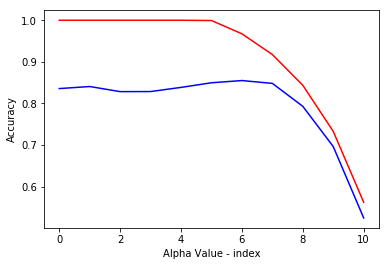

In [117]:
# Plot of training accuracy
plt.plot(validation_accuracy,color='blue')
plt.plot(training_accuracy, color='red')
plt.xlabel('Alpha Value - index')
plt.ylabel('Accuracy')
plt.show()

In [113]:
alpha_value_index = [0.1,1,3,10,33,100,333,1000,3333,10000,33333]

Training data is red, testing data is blue. Overfitting can be seen when the training accuracy is high and the testing accuracy is low (lower indexes below 5 - alpha of 33). Alignment between the training and testing curves doesn't appear to happen on the above graph until index value 7 (alpha of 1000).

The highest test accuracy occurs around an alpha of 333. With accuracy dropping at this point this is the optimum level (out of the designated alphas) for this dataset and model type balancing between bias and variance.

<h4>2.2 Part 2</h4>

In [133]:
# The confusion matrix - Total number of non-zero features in the final model.
lm_confusion_matrix = confusion_matrix(Y_test,trained_predictions)
print("\nConfusion Matrix = \n", lm_confusion_matrix)


Confusion Matrix = 
 [[78  1  0  0  0  2  0  0  3  0]
 [ 0 90  0  0  0  0  0  0  2  0]
 [ 2  3 60  0  1  0  2  4  4  3]
 [ 0  1  2 67  1  3  0  0  4  0]
 [ 0  1  2  1 53  0  3  0  1 12]
 [ 2  0  0  6  0 56  3  0  6  1]
 [ 0  0  0  0  3  0 63  0  0  0]
 [ 0  0  0  1  1  0  0 64  3  4]
 [ 1  1  1  1  0  9  1  0 57  2]
 [ 0  0  2  0  3  2  0  3  3 51]]


Majority of predictions are on the diagonal matching an identity matrix. Model generalisation aligns well to the dataset with 85.5% accuracy. Highest errors are for classes 2 and 4. Class 4 in particular has 12 incorrectly labelled as 9.

In [221]:
# Precision, recall and accuracy for each class in the confusion matrix

counter = 0
false_neg = []
actual = confusion_matrix(trained_predictions,trained_predictions) # 100% accuracy to measure from

# Calculate values
for i in range (0,10):
    for j in range (0,10):
        #print(lm_confusion_matrix[i][j])
        counter = counter + lm_confusion_matrix[i][j]
        
    # Inner loop to grab false negatives for calculation
    for neg in range (0,10):
        false_neg.append(lm_confusion_matrix[neg][i])
        
    print('Class', i,
          'Accuracy =\t%.4f' % (lm_confusion_matrix[i][i]/actual[i][i]),
          '\tPrecision =\t%.4f' % (lm_confusion_matrix[i][i]/counter), # True positive / (True positive + False positive)
          '\tRecall =\t%.4f' % (lm_confusion_matrix[i][i]/(lm_confusion_matrix[i][i] + sum(false_neg))) # True positive / (True positive + False negative)
         )
    counter = 0
    false_neg = []

Class 0 Accuracy =	0.9398 	Precision =	0.9286 	Recall =	0.4845
Class 1 Accuracy =	0.9278 	Precision =	0.9783 	Recall =	0.4813
Class 2 Accuracy =	0.8955 	Precision =	0.7595 	Recall =	0.4724
Class 3 Accuracy =	0.8816 	Precision =	0.8590 	Recall =	0.4685
Class 4 Accuracy =	0.8548 	Precision =	0.7260 	Recall =	0.4609
Class 5 Accuracy =	0.7778 	Precision =	0.7568 	Recall =	0.4375
Class 6 Accuracy =	0.8750 	Precision =	0.9545 	Recall =	0.4667
Class 7 Accuracy =	0.9014 	Precision =	0.8767 	Recall =	0.4741
Class 8 Accuracy =	0.6867 	Precision =	0.7808 	Recall =	0.4071
Class 9 Accuracy =	0.6986 	Precision =	0.7969 	Recall =	0.4113


Most accurate class is Class 0 with 93.98% accuracy. Class with the most classification errors is Class 8 with 68.67% accuracy.

Possible overfitting with several classes as they are much higher than the 84.52% achieved earlier for accuracy on the One versus Rest Classifier. Underfitting also present with accuracy scores for Class 8 and 9 significantly lower than the One versus Rest Classifier.